In [1]:
import pandas as pd
import ast

# Load the Excel file
file_path =r"C:\Users\syama\Desktop\cardekho project\source\bangalore_cars.xlsx"
df = pd.read_excel(file_path)

# Function to parse the dictionary-like strings and extract the data
def robust_extract_data_from_dict(df, column_name):
    extracted_df = pd.DataFrame()

    for i, item in enumerate(df[column_name]):
        try:
            data_dict = ast.literal_eval(item)

            if 'top' in data_dict:
                top_list = data_dict['top']
                for element in top_list:
                    key = element.get('key')
                    value = element.get('value', element.get('title'))
                    if key:  # Only include entries that have a 'key'
                        extracted_df.at[i, key] = value
            else:
                for key, value in data_dict.items():
                    extracted_df.at[i, key] = value
        except (ValueError, SyntaxError, KeyError):
            pass  # Handle any issues with data extraction by skipping problematic entries

    return extracted_df

# Extract data from all relevant columns
extracted_overview = robust_extract_data_from_dict(df, 'new_car_overview')
extracted_details = robust_extract_data_from_dict(df, 'new_car_detail')
extracted_features = robust_extract_data_from_dict(df, 'new_car_feature')
extracted_specs = robust_extract_data_from_dict(df, 'new_car_specs')

# Combine all extracted data into a single DataFrame
combined_df = pd.concat([extracted_overview, extracted_details, extracted_features, extracted_specs], axis=1)

# Save the combined data to a new Excel file
output_file_path =r'C:\Users\syama\Desktop\cardekho project\EDA\extracted_bangalore_data.xlsx'
combined_df.to_excel(output_file_path, index=False)

output_file_path


'C:\\Users\\syama\\Desktop\\cardekho project\\EDA\\extracted_bangalore_data.xlsx'

In [21]:
import pandas as pd

# Load all the provided Excel files
kolkata_data = pd.read_excel(r"C:\Users\syama\Desktop\cardekho project\EDA\extracted_kolkatacar_data.xlsx")
jaipur_data = pd.read_excel(r"C:\Users\syama\Desktop\cardekho project\EDA\extracted_jaipurcar_data.xlsx")
delhi_data = pd.read_excel(r"C:\Users\syama\Desktop\cardekho project\EDA\extracted_delhi_data.xlsx")
bangalore_data = pd.read_excel(r"C:\Users\syama\Desktop\cardekho project\EDA\extracted_bangalore_data.xlsx")
hyderabad_data = pd.read_excel(r"C:\Users\syama\Desktop\cardekho project\EDA\extracted_hyderabad_data.xlsx")
chennai_data = pd.read_excel(r"C:\Users\syama\Desktop\cardekho project\EDA\extracted_chennaicar_data.xlsx")

# Combine all data into a single DataFrame
combined_data = pd.concat([kolkata_data, jaipur_data, delhi_data, bangalore_data, hyderabad_data, chennai_data])

# Display the first few rows of the combined data to check the structure
combined_data.head()

# Save the combined data to a new Excel file
combined_data.to_excel(r'C:\Users\syama\Desktop\cardekho project\EDA\combined_data.xlsx', index=False)

In [12]:
import pandas as pd

# Load the entire Excel file into a dictionary of DataFrames
file_path = r"C:\Users\syama\Desktop\cardekho project\EDA\combined_data.xlsx"
df_dict = pd.read_excel(file_path, sheet_name=None)

# Function to clean and convert 'Price' column
def clean_and_convert_price(value):
    value = value.replace('₹', '').replace(',', '').strip()
    if 'Lakh' in value:
        return float(value.split(' ')[0]) * 100000
    elif 'Crore' in value:
        return float(value.split(' ')[0]) * 10000000
    return float(value)

# Define the replacements to be made in all columns
replacements = {
    ',': '',
    'kmpl': '',
    'CC': '',
    'bhp': '',
    'Nm': '',
    'Kms': '',
    'Seats': '',
    '₹': '',
}

# Process each sheet in the dictionary
for sheet_name, df in df_dict.items():
    df.replace(replacements, regex=True, inplace=True)
    
    # Clean and convert the 'Price' column if it exists
    if 'Price' in df.columns:
        df['Price'] = df['Price'].apply(clean_and_convert_price)
    
    # Convert specific columns to float if they exist
    for col in ['Mileage', 'Max Power', 'Torque']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df_dict[sheet_name] = df

# Save the modified DataFrames back to a new Excel file
output_file_path = r"C:\Users\syama\Desktop\cardekho project\EDA\modified_combined_data.xlsx"
with pd.ExcelWriter(output_file_path) as writer:
    for sheet_name, df in df_dict.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Modified file saved at: {output_file_path}")


Modified file saved at: C:\Users\syama\Desktop\cardekho project\EDA\modified_combined_data.xlsx


In [13]:
modified_combined_data=pd.read_excel(r"C:\Users\syama\Desktop\cardekho project\EDA\modified_combined_data.xlsx")
modified_combined_data.isnull().sum()

City                     0
Registration Year       52
Insurance Validity       4
Fuel Type                0
Seats                    6
Kms Driven               2
RTO                    894
Ownership               32
Transmission             0
Body type                4
OEM                      0
Model                    0
ModelYear                0
CentralVariantId         0
VariantName              0
Price                    0
Mileage                323
Engine                   4
Max Power              246
Torque                 832
Wheel Size            2983
dtype: int64

In [15]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel(r"C:\Users\syama\Desktop\cardekho project\EDA\modified_combined_data.xlsx", sheet_name='Sheet1')

# Check for missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Combine both counts and percentages into a single DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Display columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data


,Missing Values,Percentage (%)
Wheel Size,2983,35.643446
RTO,894,10.682280
Torque,832,9.941451
Mileage,323,3.859481
Max Power,246,2.939419
Registration Year,52,0.621341
Ownership,32,0.382363
Seats,6,0.071693
Insurance Validity,4,0.047795
Body type,4,0.047795


Observations:

High Missing Values: Wheel Size has a high percentage of missing values (35.7%). We need to decide whether to impute, drop, or leave it as is based on its importance in the analysis.
Moderate Missing Values: RTO, Max Power, Torque, and Mileage have moderate missing values between 5% and 11%.
Low Missing Values: The rest of the columns have negligible missing values (<1%) and can be easily imputed.

In [16]:
# Identify non-convertible values
non_numeric_prices = df[pd.to_numeric(df['Price'], errors='coerce').isnull()]['Price'].unique()
print(non_numeric_prices)

# If any non-numeric values exist, handle them accordingly
# For example, remove rows or set to NaN


[]


In [14]:
# Check data types after conversion
print(df[['Price', 'Mileage', 'Max Power', 'Torque']].dtypes)


Price        float64
Mileage      float64
Max Power    float64
Torque       float64
dtype: object


In [21]:
import pandas as pd

# Load your DataFrame (assuming it's already loaded as df)
# df = pd.read_excel("path_to_your_file.xlsx")

# Convert problematic columns to numeric types, coercing errors to NaN
columns_to_convert = ['Max Power', 'Torque', 'Mileage', 'Seats', 'Wheel Size', 'Kms Driven', 'Engine']

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Function to impute numerical columns based on model and variant
def impute_numeric_feature(df, column):
    # Group by Model and VariantName and calculate mean
    grouped = df.groupby(['Model', 'VariantName'])[column].transform('mean')
    # Fill missing values with the grouped mean
    df[column] = df[column].fillna(grouped)
    # If still missing, fill with overall mean
    df[column] = df[column].fillna(df[column].mean())
    return df

# Function to impute categorical columns with mode
def impute_categorical_feature(df, column):
    df[column] = df[column].fillna(df[column].mode()[0])
    return df

# Impute numerical columns
for col in columns_to_convert:
    df = impute_numeric_feature(df, col)

# Group columns into categorical
categorical_columns = ['Registration Year', 'Insurance Validity', 'RTO', 'Ownership', 'Body type']

# Impute categorical columns
for col in categorical_columns:
    df = impute_categorical_feature(df, col)

# Check remaining missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Should output an empty series if no missing values remain

output_file_path = r"C:\Users\syama\Desktop\cardekho project\EDA\processed_data.xlsx"
df.to_excel(output_file_path, index=False)
print(f"Final cleaned data saved at: {output_file_path}")



Series([], dtype: int64)
Final cleaned data saved at: C:\Users\syama\Desktop\cardekho project\EDA\processed_data.xlsx


DESCRIPTIVE STATISTICS

In [10]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\syama\Desktop\cardekho project\EDA\processed_data.xlsx"
df = pd.read_excel(file_path)

# Calculate descriptive statistics for the entire dataset
descriptive_stats = df.describe(include='all')

# Calculate mode separately since `describe()` doesn't provide it for all columns
mode = df.mode().iloc[0]  # mode can have multiple values, taking the first one

# Add mode to descriptive statistics
descriptive_stats.loc['mode'] = mode

# Display the combined descriptive statistics
print(descriptive_stats)


         City Registration Year     Insurance Validity Fuel Type        Seats  \
count    8369              8369                   8369      8369  8369.000000   
unique      6               233                      7         5          NaN   
top     Delhi              2022  Third Party insurance    Petrol          NaN   
freq     1485               277                   4059      5554          NaN   
mean      NaN               NaN                    NaN       NaN     5.203276   
std       NaN               NaN                    NaN       NaN     0.663551   
min       NaN               NaN                    NaN       NaN     2.000000   
25%       NaN               NaN                    NaN       NaN     5.000000   
50%       NaN               NaN                    NaN       NaN     5.000000   
75%       NaN               NaN                    NaN       NaN     5.000000   
max       NaN               NaN                    NaN       NaN    10.000000   
mode    Delhi              2

Skewness of all numeric columns:
Seats                2.589676
Kms Driven          50.388101
ModelYear           -0.911735
CentralVariantId     0.006239
Price               10.002946
Mileage              5.096599
Engine               1.615119
Max Power            2.305076
Torque               1.653051
Wheel Size           0.213104
dtype: float64


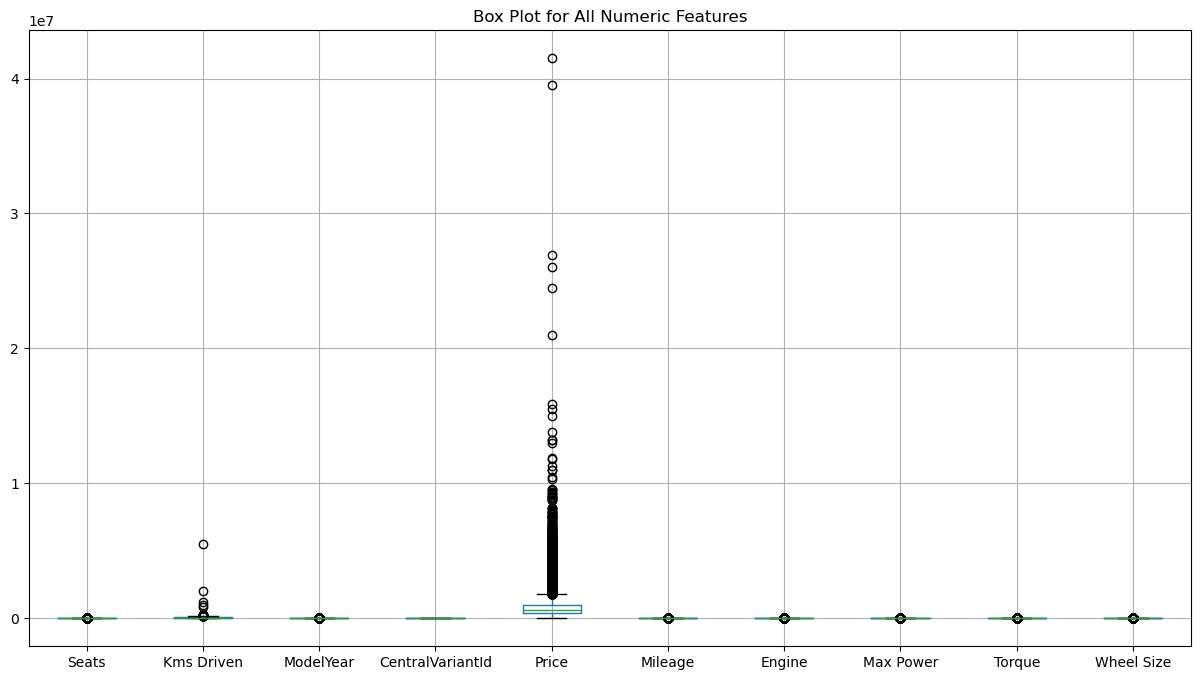

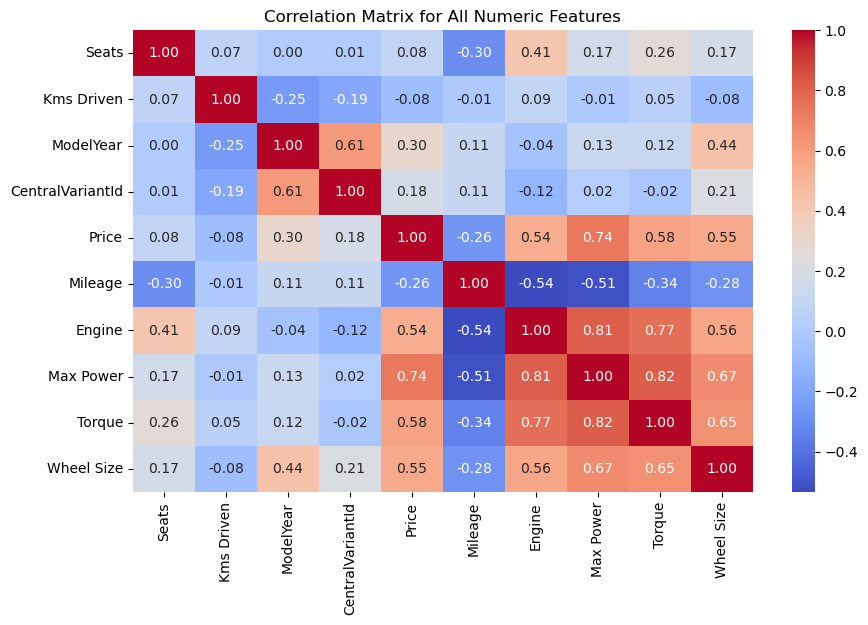

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load the dataset
file_path = r"C:\Users\syama\Desktop\cardekho project\EDA\processed_data.xlsx"
df = pd.read_excel(file_path)

# Filter numeric columns only
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate skewness for all numeric columns
skewness = numeric_cols.apply(lambda x: skew(x.dropna()))
print("Skewness of all numeric columns:")
print(skewness)

# Correlation matrix for all numeric columns
correlation_matrix = numeric_cols.corr()

# Box plot for all numeric features
plt.figure(figsize=(15, 8))
numeric_cols.boxplot()
plt.title('Box Plot for All Numeric Features')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for All Numeric Features')
plt.show()


Key Points from the Correlation Matrix:
Correlation with Price:
Features like Max Power, Engine, and Torque are strongly correlated with Price, indicating that they are likely important predictors in a pricing model.
Features with negative correlations like Car_Age and Mileage suggest that older cars and those with higher mileage tend to be priced lower.

WITHOUT REMOVING OUTLIERS

Skewness:

Skewness near 0: Data is symmetrically distributed (normal).
Skewness > 0: Data is positively skewed (tail on the right).
Skewness < 0: Data is negatively skewed (tail on the left).
Kurtosis:

Kurtosis ≈ 3: Data has normal tail behavior.
Kurtosis > 3: Data has heavy tails (leptokurtic).
Kurtosis < 3: Data has light tails (platykurtic).

If your data is normally distributed: opt to use the Z-Score method for outlier detection.
If your data is skewed: The IQR method is typically more appropriate.

In [ ]:
RANDOM FOREST

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
file_path = r"C:\Users\syama\Desktop\cardekho project\EDA\processed_data.xlsx"
df = pd.read_excel(file_path)

# Feature Engineering
df['Car_Age'] = 2024 - df['ModelYear']

# Select features for modeling
features = ['Car_Age', 'Mileage', 'Engine', 'Max Power', 'Seats', 'Fuel Type', 'Transmission', 'Body type']
X = pd.get_dummies(df[features], drop_first=True)  # One-hot encoding for categorical variables
y = df['Price']  # Target variable

# Save the feature names
feature_names = X.columns
joblib.dump(feature_names, r"C:\Users\syama\Desktop\cardekho project\EDA\feature_names.pkl")
print("Feature names saved successfully.")

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1,
                               error_score='raise')

# Fitting the model
rf_random.fit(X_train, y_train)

# Best parameters from the RandomizedSearchCV
best_params = rf_random.best_params_

# Predicting on the test set
y_pred = rf_random.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Save the predicted and actual values to a DataFrame
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Save the trained model to a .pkl file
model_filename = r"C:\Users\syama\Desktop\cardekho project\EDA\random_forest_model.pkl"
joblib.dump(rf_random.best_estimator_, model_filename)

print(f"Trained model saved to {model_filename}")


Feature names saved successfully.
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Mean Absolute Error (MAE): 149156.15423713074
Mean Squared Error (MSE): 150531369737.44308
R-squared (R²): 0.9330068304131759
Trained model saved to C:\Users\syama\Desktop\cardekho project\EDA\random_forest_model.pkl


In [2]:
X

,Car_Age,Mileage,Engine,Max Power,Seats,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_LPG,Fuel Type_Petrol,Transmission_Manual,Body type_Coupe,Body type_Hatchback,Body type_Hybrids,Body type_MUV,Body type_Minivans,Body type_Pickup Trucks,Body type_SUV,Body type_Sedan,Body type_Wagon
0,10,19.16,2494.0,158.200000,5.0,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,7,22.70,799.0,53.640000,5.0,False,False,False,True,True,False,True,False,False,False,False,False,False,False
2,3,19.03,999.0,71.010000,5.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,13,17.00,1197.0,105.220112,5.0,False,False,False,True,True,False,True,False,False,False,False,False,False,False
4,10,15.73,1968.0,174.330000,5.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,6,22.00,1197.0,81.800000,5.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False
8365,6,19.87,1461.0,83.800000,5.0,True,False,False,False,True,False,False,False,False,False,False,True,False,False
8366,6,17.00,1198.0,108.500000,5.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False
8367,7,16.65,1968.0,141.000000,5.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False


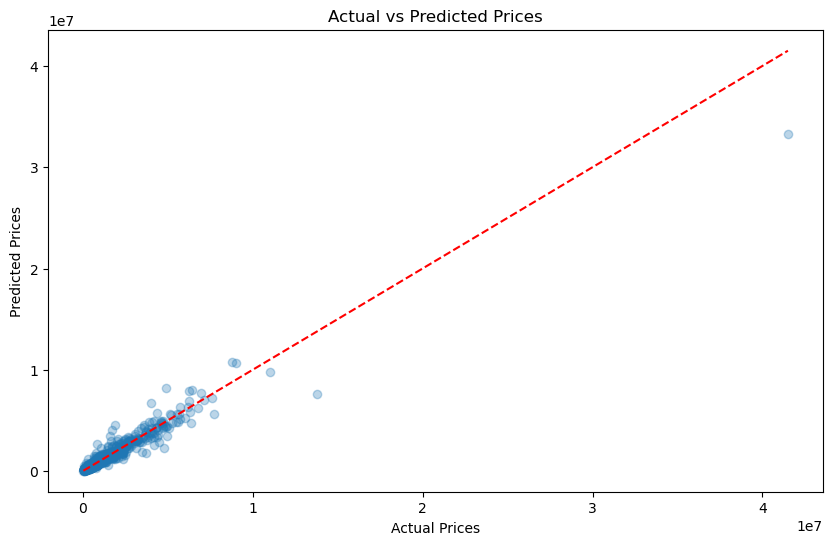

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


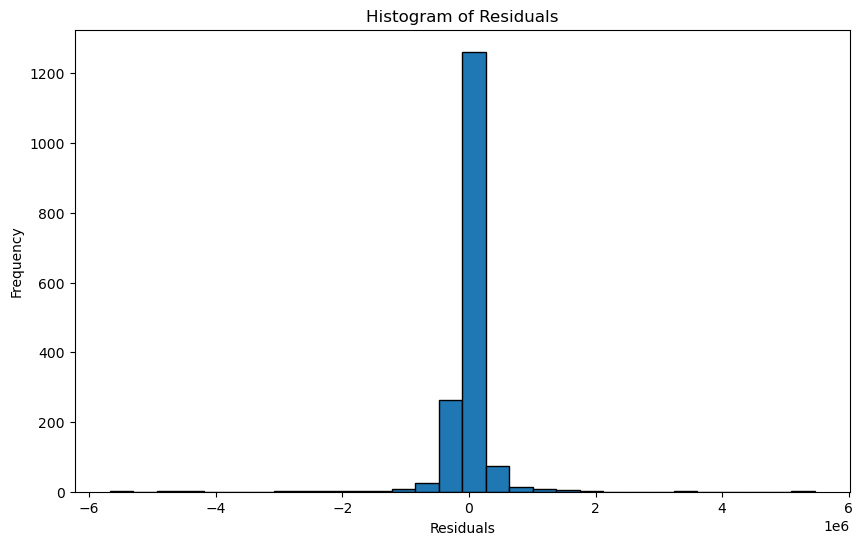

In [26]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()



In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path =r"C:\Users\syama\Desktop\cardekho project\EDA\processed_data.xlsx"
df = pd.read_excel(file_path)

# Feature Engineering
df['Car_Age'] = 2024 - df['ModelYear']

# Select features for modeling
features = ['Car_Age', 'Mileage', 'Engine', 'Max Power', 'Seats', 'Fuel Type', 'Transmission', 'Body type']
X = pd.get_dummies(df[features], drop_first=True)  # One-hot encoding for categorical variables
y = df['Price']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 393947.1465090382
Mean Squared Error (MSE): 878834548860.0675
R-squared (R²): 0.6088794510191864


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load the dataset
file_path =r"C:\Users\syama\Desktop\cardekho project\EDA\processed_data.xlsx"
df = pd.read_excel(file_path)

# Feature Engineering
df['Car_Age'] = 2024 - df['ModelYear']

# Select features for modeling
features = ['Car_Age', 'Mileage', 'Engine', 'Max Power', 'Seats', 'Fuel Type', 'Transmission', 'Body type']
X = pd.get_dummies(df[features], drop_first=True)  # One-hot encoding for categorical variables
y = df['Price']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge.fit(X_train, y_train)

# Predicting on the test set
y_pred = ridge.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression - Mean Absolute Error (MAE):", mae)
print("Ridge Regression - Mean Squared Error (MSE):", mse)
print("Ridge Regression - R-squared (R²):", r2)


Ridge Regression - Mean Absolute Error (MAE): 392865.49116776144
Ridge Regression - Mean Squared Error (MSE): 877238433056.7291
Ridge Regression - R-squared (R²): 0.6095897936997836


In [ ]:
LASSO REFGRESSION

In [13]:
from sklearn.linear_model import Lasso


# Initialize and train the Lasso Regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso.fit(X_train, y_train)

# Predicting on the test set
y_pred = lasso.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression - Mean Absolute Error (MAE):", mae)
print("Lasso Regression - Mean Squared Error (MSE):", mse)
print("Lasso Regression - R-squared (R²):", r2)


Lasso Regression - Mean Absolute Error (MAE): 393443.8804397085
Lasso Regression - Mean Squared Error (MSE): 878209126743.7927
Lasso Regression - R-squared (R²): 0.6091577917396092


C:\Users\syama\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.523e+15, tolerance: 1.302e+12
  model = cd_fast.enet_coordinate_descent(


In [ ]:
HYPERPARAMETER TUNING 

In [17]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path =r"C:\Users\syama\Desktop\cardekho project\EDA\processed_data.xlsx"
df = pd.read_excel(file_path)

# Feature Engineering
df['Car_Age'] = 2024 - df['ModelYear']

# Select features for modeling
features = ['Car_Age', 'Mileage', 'Engine', 'Max Power', 'Seats', 'Fuel Type', 'Transmission', 'Body type']
X = pd.get_dummies(df[features], drop_first=True)  # One-hot encoding for categorical variables
y = df['Price']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values for tuning
alpha_values = {'alpha': [0.1, 1, 10, 100, 1000]}

# Ridge Regression with GridSearchCV
ridge = Ridge()
ridge_search = GridSearchCV(estimator=ridge, param_grid=alpha_values, cv=5)
ridge_search.fit(X_train_scaled, y_train)

# Best Ridge alpha and model evaluation
best_alpha_ridge = ridge_search.best_params_['alpha']
best_ridge_model = ridge_search.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

ridge_test_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_pred_ridge)

# Lasso Regression with GridSearchCV, with increased max_iter
lasso = Lasso(max_iter=10000)  # Increased max_iter to help with convergence
lasso_search = GridSearchCV(estimator=lasso, param_grid=alpha_values, cv=5)
lasso_search.fit(X_train_scaled, y_train)

# Best Lasso alpha and model evaluation
best_alpha_lasso = lasso_search.best_params_['alpha']
best_lasso_model = lasso_search.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test_scaled)

lasso_test_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_pred_lasso)

# Print the results
print(f"Best Alpha Ridge: {best_alpha_ridge}")
print(f"Ridge MAE: {ridge_test_mae}")
print(f"Ridge MSE: {ridge_test_mse}")
print(f"Ridge R-squared: {ridge_test_r2}")

print(f"Best Alpha Lasso: {best_alpha_lasso}")
print(f"Lasso MAE: {lasso_test_mae}")
print(f"Lasso MSE: {lasso_test_mse}")
print(f"Lasso R-squared: {lasso_test_r2}")


Best Alpha Ridge: 100
Ridge MAE: 385920.22266600456
Ridge MSE: 881550412774.8107
Ridge R-squared: 0.6076707705153654
Best Alpha Lasso: 1000
Lasso MAE: 391980.9185415397
Lasso MSE: 877538123609.5332
Lasso R-squared: 0.6094564180448447


In [23]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Initialize XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_params = grid_search.best_params_
y_pred = grid_search.best_estimator_.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 762.6 kB/s eta 0:02:44
   ---------------------------------------- 0.5/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 1.1/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 1.9/124.9 MB 7.5 MB/s eta 0:00:17
    --------------------------------------- 2.8/124.9 MB 9.4 MB/s eta 0:00:14
   - -------------------------------------- 3.8/124.9 MB 11.1 MB/s eta 0:00:11
   - -------------------------------------- 4.7/124.9 MB 12.1 MB/s eta 0:00:10
   - -------------------------------------- 6.0/124.9 MB 13.6 MB/s eta 0:00:09
   -- ------------------------------------- 7.2/124.9 MB 14.9 MB/s eta 0:00:08
   -- ------------------------------------- 8.6/124.9 MB 16.7 MB/s eta